# Rakamin Final Project - Kelompok 8 (Infinity)

### Anggota Kelompok:
- Andre Adeputra S
- Gilang Muhammad Risky
- Jomas Sekar Pawestri
- M Nurkholis Fauzi
- Muhammad Syarif U
- Naomi Florenata Damanik
- Sakinah Nurul R
- Vanesa

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

import warnings
warnings.filterwarnings("ignore")

pd.options.display.max_columns = None
pd.set_option('display.precision', 2)

In [4]:
rcParams['figure.figsize'] = 12, 8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Dataset diambil dari Kaggle, [Holiday Package Prediction](https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction)

In [5]:
# Load Data
df = pd.read_csv('data/Travel.csv')
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


# 1. Exploratory Data Analysis

## 1.1 Descriptive Analysis

In [6]:
df.shape

(4888, 20)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Data terdiri dari 4888 baris dan 20 kolom yang terbagi menjadi 14 kolom numerik dan 6 kolom kategori bedasarkan jenis data. Berdasarkan pengamatan lebih lanjut kolom ProdTaken, CityTier, PreferredPropertyStar, Passport, dan OwnCar merupakan kolom kategori.

In [8]:
# Separate columns based on data type
cats = ['ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 
        'OwnCar', 'PitchSatisfactionScore', 'TypeofContact', 'Occupation', 'Gender', 'ProductPitched',
        'MaritalStatus', 'Designation']
nums = ['CustomerID', 'Age', 'DurationOfPitch',
       'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips', 
       'NumberOfChildrenVisiting', 'MonthlyIncome']

In [9]:
df[cats] = df[cats].astype('object')

In [10]:
# Check for missing values
df.isnull().sum().sort_values(ascending = False)

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Designation                   0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
CustomerID                    0
MaritalStatus                 0
ProdTaken                     0
NumberOfPersonVisiting        0
Gender                        0
Occupation                    0
CityTier                      0
ProductPitched                0
dtype: int64

Missing values ada di 8 kolom: Age, TypeOfContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, MonthlyIncome

In [11]:
# Check for duplicated rows ignoring CustomerID column
dupes = df.drop('CustomerID', axis=1).duplicated()
print(f'Total Duplicate Rows: {dupes.sum()}')

Total Duplicate Rows: 141


Terdapat 141 baris data yang apabila kolom CustomerID diabaikan menunjukkan nilai kolom yang identik

In [12]:
# Descriptive statistics for numerical columns
df[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.50,1411.19,200000.0,201221.75,202443.5,203665.25,204887.0
Age,4662.0,37.62,9.32,18.0,31.00,36.0,44.00,61.0
DurationOfPitch,4637.0,15.49,8.52,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.91,0.72,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.71,1.00,1.0,3.00,4.0,4.00,6.0
NumberOfTrips,4748.0,3.24,1.85,1.0,2.00,3.0,4.00,22.0
NumberOfChildrenVisiting,4822.0,1.19,0.86,0.0,1.00,1.0,2.00,3.0
MonthlyIncome,4655.0,23619.85,5380.70,1000.0,20346.00,22347.0,25571.00,98678.0


Rentang nilai max dan min DurationOfPitch dan NumberOfTrips cukup jauh

MonthlyIncome memiliki nilai std yang cukup tinggi, menunjukkan ada kecenderungan pendapatan memengaruhi pemilihan produk

In [13]:
# Descriptive statistics for categorical columns
df[cats].describe().T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
CityTier,4888,3,1,3190
PreferredPropertyStar,4862.0,3.0,3.0,2993.0
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
PitchSatisfactionScore,4888,5,3,1478
TypeofContact,4863,2,Self Enquiry,3444
Occupation,4888,4,Salaried,2368
Gender,4888,3,Male,2916
ProductPitched,4888,5,Basic,1842


In [14]:
for i in df[cats].columns:
    x = df[i].unique()
    print(f'{i}: {x}')
    print()

ProdTaken: [1 0]

CityTier: [3 1 2]

PreferredPropertyStar: [3.0 4.0 5.0 nan]

Passport: [1 0]

OwnCar: [1 0]

PitchSatisfactionScore: [2 3 5 4 1]

TypeofContact: ['Self Enquiry' 'Company Invited' nan]

Occupation: ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']

Gender: ['Female' 'Male' 'Fe Male']

ProductPitched: ['Deluxe' 'Basic' 'Standard' 'Super Deluxe' 'King']

MaritalStatus: ['Single' 'Divorced' 'Married' 'Unmarried']

Designation: ['Manager' 'Executive' 'Senior Manager' 'AVP' 'VP']



Pada kategori gender terdapat 3 nilai unik (harusnya hanya ada 2)

In [15]:
# The contents of the Gender column contain an error in writing “Fe Male” which should be “Female”.
df.replace('Fe Male','Female', inplace = True)

CityTier dapat menunjukkan klasifikasi kota target produk yang sesuai

PreferredPropertyStar menunjukkan kecenderungan kategori star 3-5 dan mungkin dapat digunakan sebagai kriteria penentuan produk package yang baru

ProdTaken memiliki mean yang cukup rendah menandakan kebanyakan produk yang tidak dipilih dapat menjadi evaluasi produk baru

PitchSatisfactionScore beragam dan dapat menjadi masukan untuk perbaikan produk


Berdasarkan insight-insight yang diperoleh di atas, beberapa tindak lanjut yang perlu dilakukan antara lain:
* Klasifikasi data mana yang numerical dan categorical (fitur prodtaken, citytier, etc merupakan categorical masih dalam numerical)
* Handling missing value
* Cek klasifikasi di fitur gender
* Persentase klasifikasi 


## 1.2 Univariate Analysis

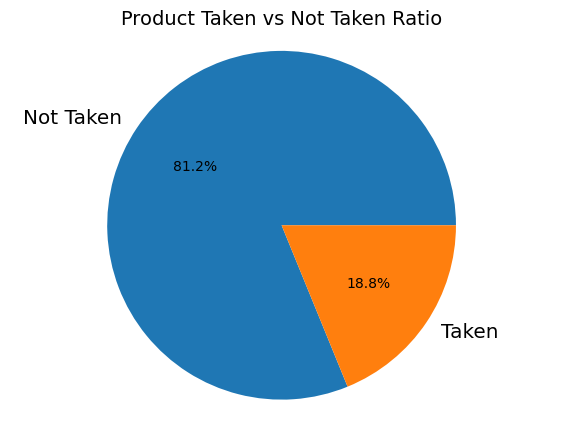

In [16]:
# Check for customers' purchase ratio
plt.figure(figsize=(7,5))
plt.pie(df['ProdTaken'].value_counts(), labels=['Not Taken', 'Taken'], autopct='%0.1f%%')
plt.axis('equal')
plt.title('Product Taken vs Not Taken Ratio', fontsize=14)
plt.show()

Target kolom ProdTaken lebih banyak yang tidak mengambil produk yang ditawarkan

<Figure size 1200x800 with 0 Axes>

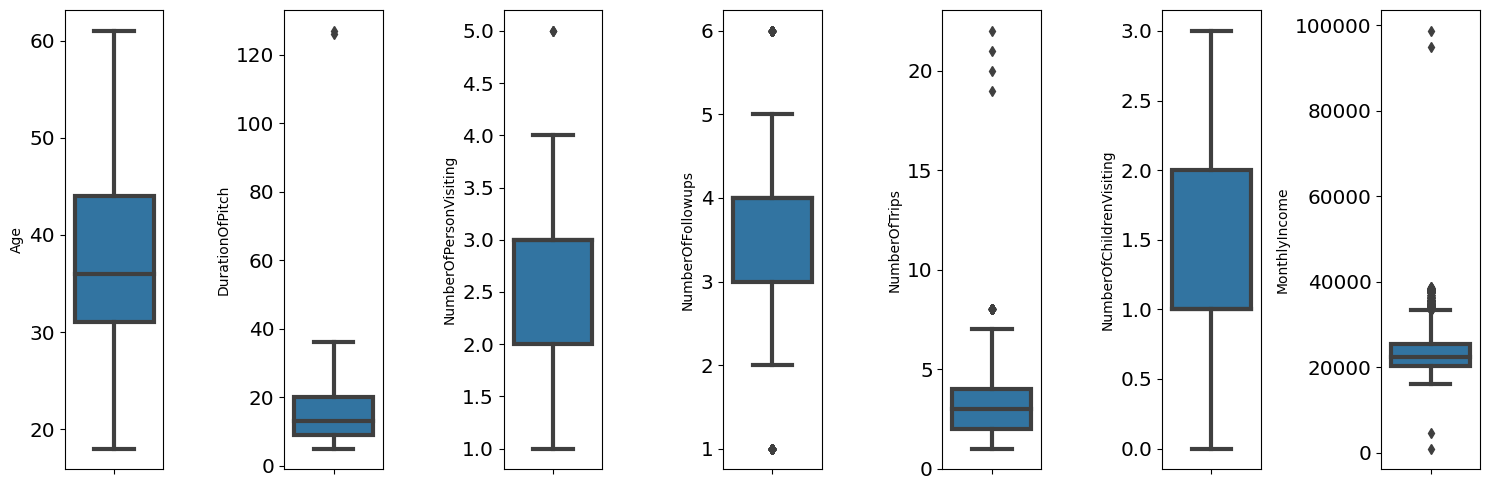

In [17]:
plt.suptitle('Boxplot untuk Kolom Numerik', fontsize=14)
plt.figure(figsize=(15,5))
for i in range(1, len(nums)):
    plt.subplot(1, 7, i)
    sns.boxplot(y=df[nums[i]])
    plt.tight_layout()

kolom ProdTaken, CityTier, PreferredPropertyStar, Passport, PitchSatisfactionScore dan OwnCar merupakan fitur kategorical

DurationOfPitch secara umum (IQR) tersebar dari 9-20 menit, namun terdapat outlier maximal dengan durasi selama 127 menit

kisaran NumerOfTrips yang diambil adalah 2-4 trips, namun terdapat banyak outlier dengan maksimal jumlah trips sebanyak 22

MonthlyIncome secara umum berkisar 20-25 ribu rupe(?), memiliki data outlier dengan income terendah 1000 rupee dan tertinggi sekitar 98678 rupe


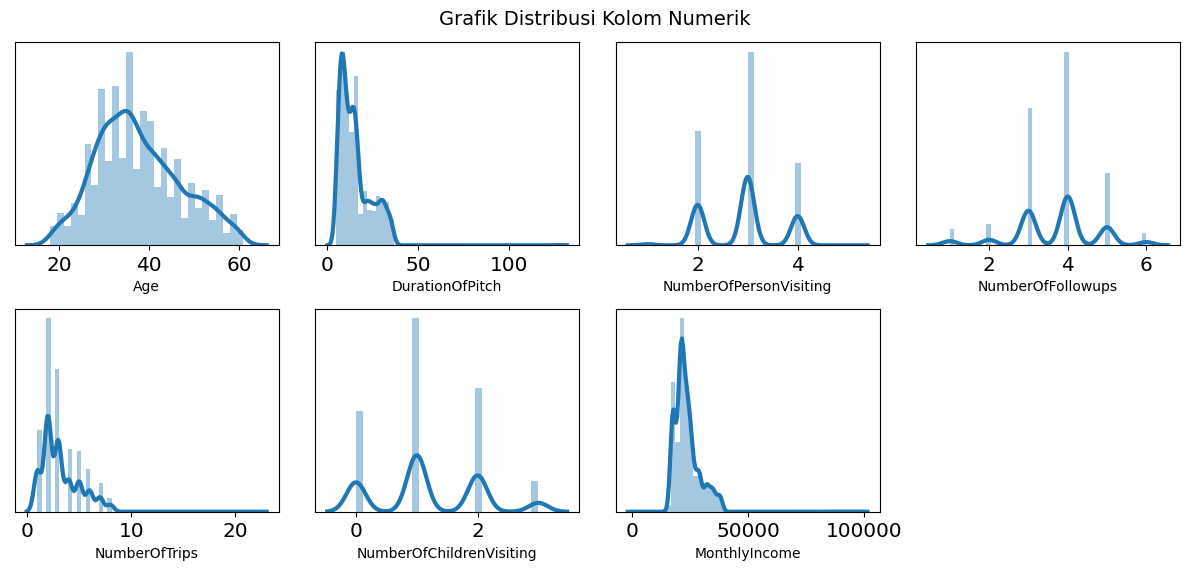

In [18]:
plt.suptitle('Grafik Distribusi Kolom Numerik', fontsize=14)
for i in range(1, len(nums)):
    plt.subplot(3, 4, i)
    sns.distplot(df[nums[i]])
    plt.ylabel('')
    plt.yticks([])
    plt.tight_layout()

Fitur ProdTaken, Passport, dan Owncar memiliki distribusi data berbentuk bimodal (categorical)

Fitur Age memiliki sebaran data yang cukup normal

kolom DurationOfPitch, NumberOfTrips dan MonthlyIncome memiliki sebaran data positif skew (right tail)

Kolom Passport lebih banyak yang tidak memiliki passport

kolom OwnCar lebih banyak yang memiliki mobil


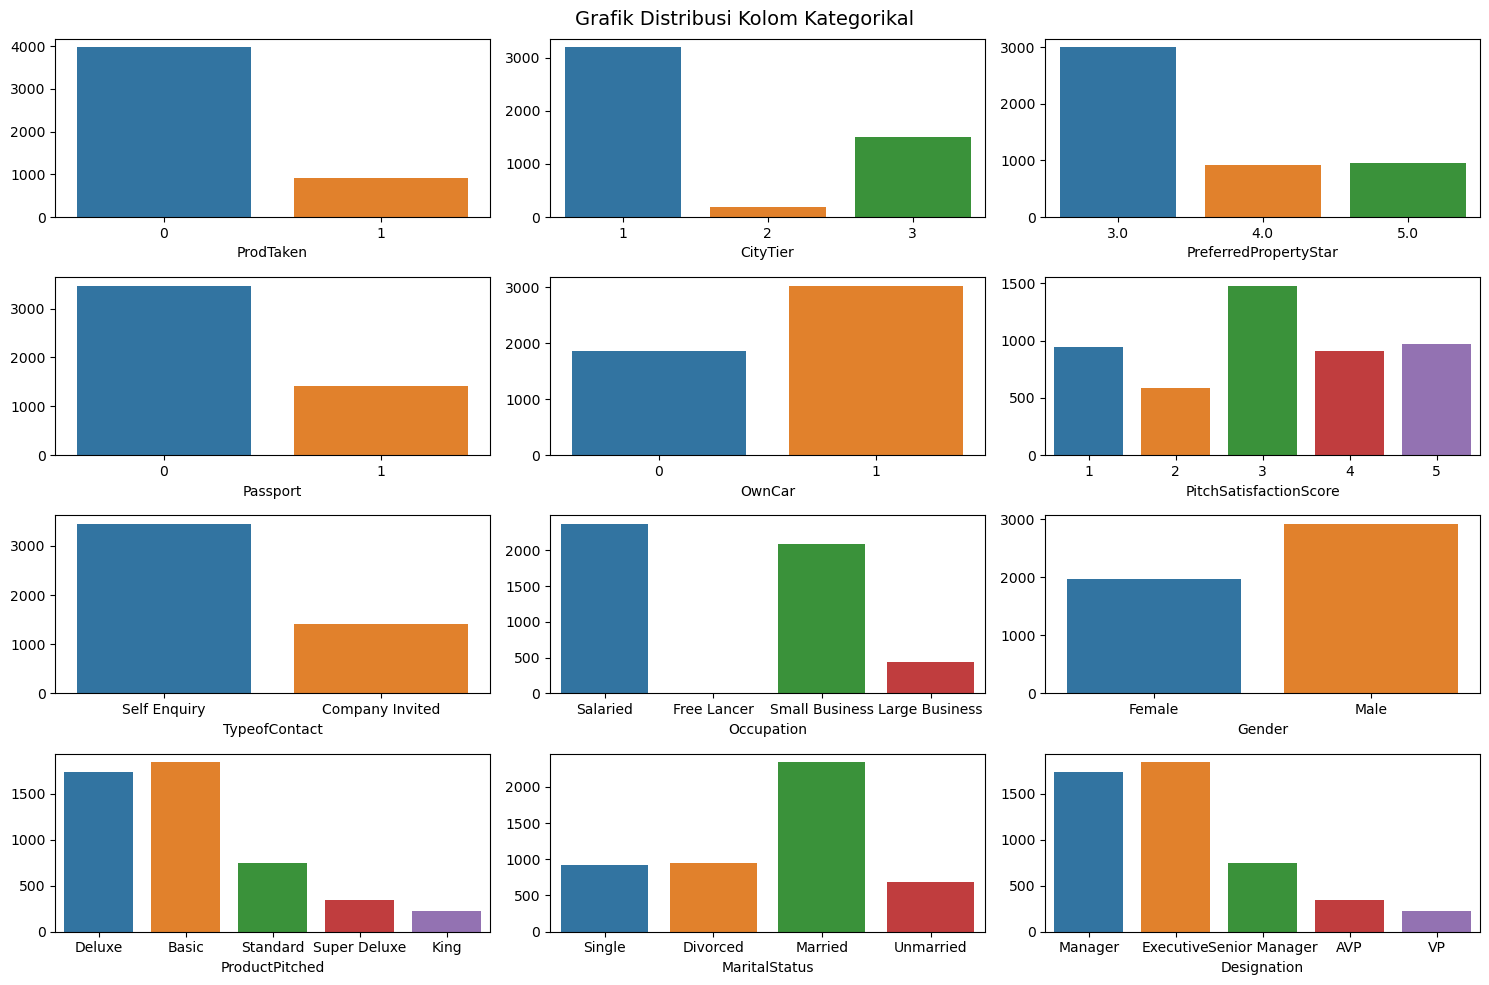

In [19]:
plt.figure(figsize=(15,10))
plt.suptitle('Grafik Distribusi Kolom Kategorikal', fontsize=14)

for i, col in enumerate(cats):
    plt.subplot(4, 3, i+1)
    sns.countplot(x=df[col])
    plt.ylabel('')
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()

TypeofContact didominasi oleh Self Enquiry

FItur Occupation didominasi Salaried 

Fitur Gender didominasi pelanggan laki-laki 

Fitur ProductPitched didominasi Basic 

Fitur MaritalStatus didominasi Married

Fitur Designation didominasi Executive

Redundant dalam kategori gender female dan fe-male

Redundant kategori Single dan Unmarried dalam fitur MaritalStatus


## 1.3 Multivariate Analysis

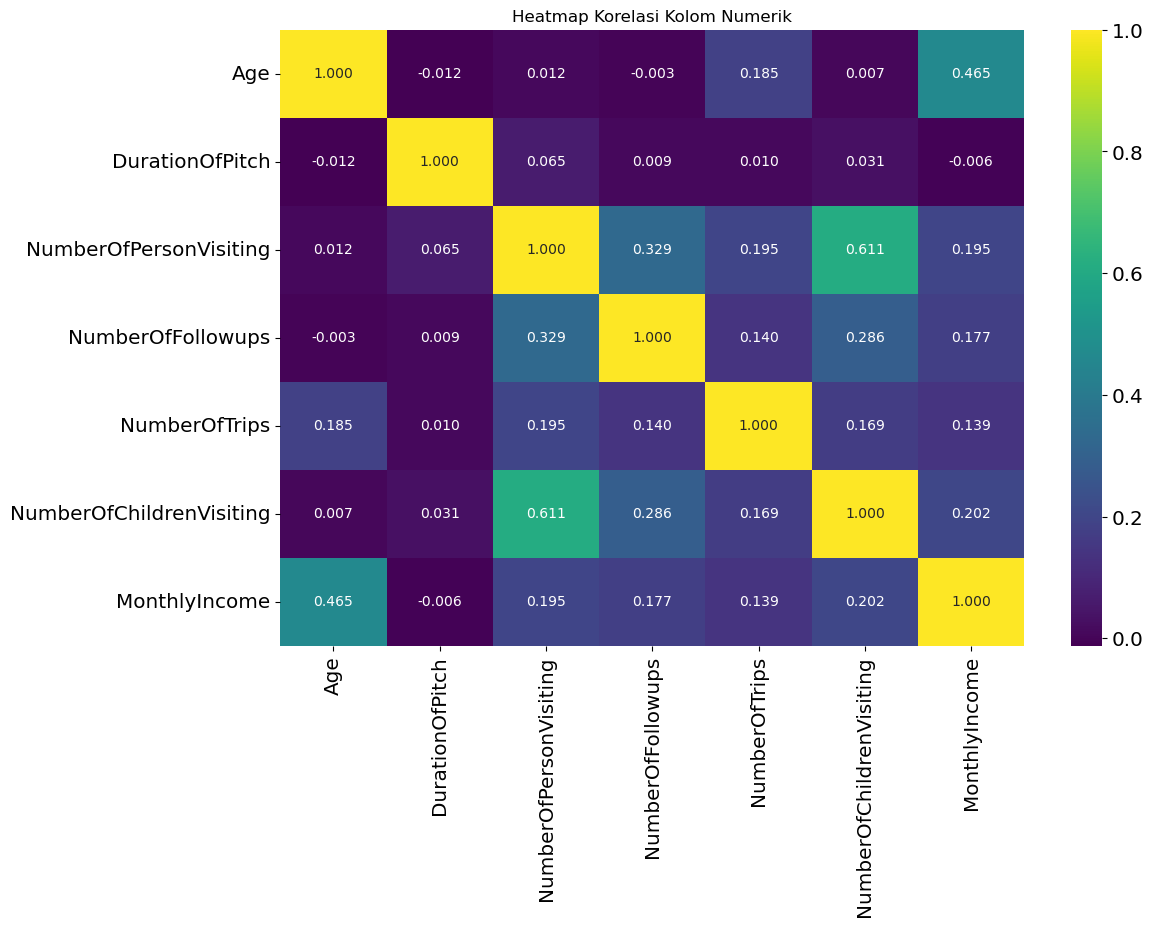

In [20]:
# Skips CustomerID column
plt.title('Heatmap Korelasi Kolom Numerik')
sns.heatmap(df[nums[1:]].corr(), cmap='viridis', annot=True, fmt='.3f')
plt.show()

Tidak ada 2 fitur yang berkorelasi kuat (>0.7), maka kemungkinan tidak ada fitur yang redundan. Namun korelasi tertinggi antara fitur NumberofChildrenVisiting dengan fitur NumberOfPersonVisiting sebesar 0.61

Fitur ProdTaken (target) berkorelasi positif dengan fitur kepemilikan passport, number of follow ups dan preferred property star.

Fitur kepemilikan passport memiliki korelasi paling tinggi dengan fitur ProdTaken (target) dengan nilai (0.26), maka fitur tersebut harus dipertahankan. (jumlah pelanggan yang memiliki passpor dan tidak, cukup timpang)

Semakin tinggi jumlah follow-up semakin besar potensi customer untuk membeli paket travel baru. Nilai korelasi ProdTaken terhadap NumberofFollowup 0.11

Customer yang berpotensi membeli paket baru adalah customer yang memilih properti bintang 5, semakin tinggi jumlah bintang, semakin tinggi juga potensi customer untuk membeli paket baru. Nilai korelasi ProdTaken dan PropertyStar 0.10

Fitur ProdTaken (target) berkorelasi negatif dengan Age dan Monthly Income.

Korelasi negatif antara fitur ProdTaken (produk yang dibeli) dengan Age, berarti bahwa semakin muda usia customer maka semakin besar kemungkinan mereka untuk membeli produk tersebut. (-0.15)

Korelasi negatif antara fitur ProdTaken (produk yang dibeli) dengan Monthly Income, berarti bahwa semakin rendah pendapatan bulanannya, semakin besar kemungkinan mereka untuk membeli produk tersebut. (-0.13)

Korelasi tertinggi antara fitur NumberofChildrenVisiting dengan fitur NumberOfPersonVisiting sebesar 0.61



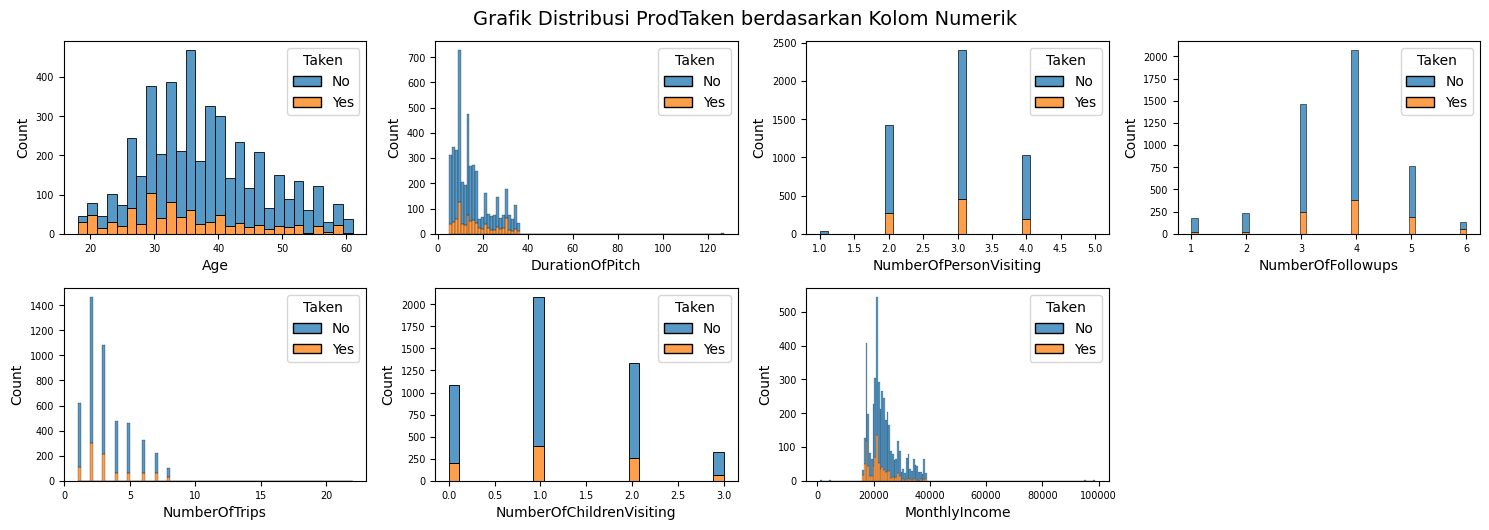

In [ ]:
plt.figure(figsize=(15,10))
plt.suptitle('Grafik Distribusi ProdTaken berdasarkan Kolom Numerik', fontsize=14)


for i, col in enumerate(nums[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)        
    sns.histplot(data=df, x=col, hue='ProdTaken', multiple='stack')

    # Custom legend
    legend = plt.gca().get_legend()
    legend.set_title('Taken')
    legend.get_texts()[0].set_text('No')
    legend.get_texts()[1].set_text('Yes')
            
plt.tight_layout()

plt.show()

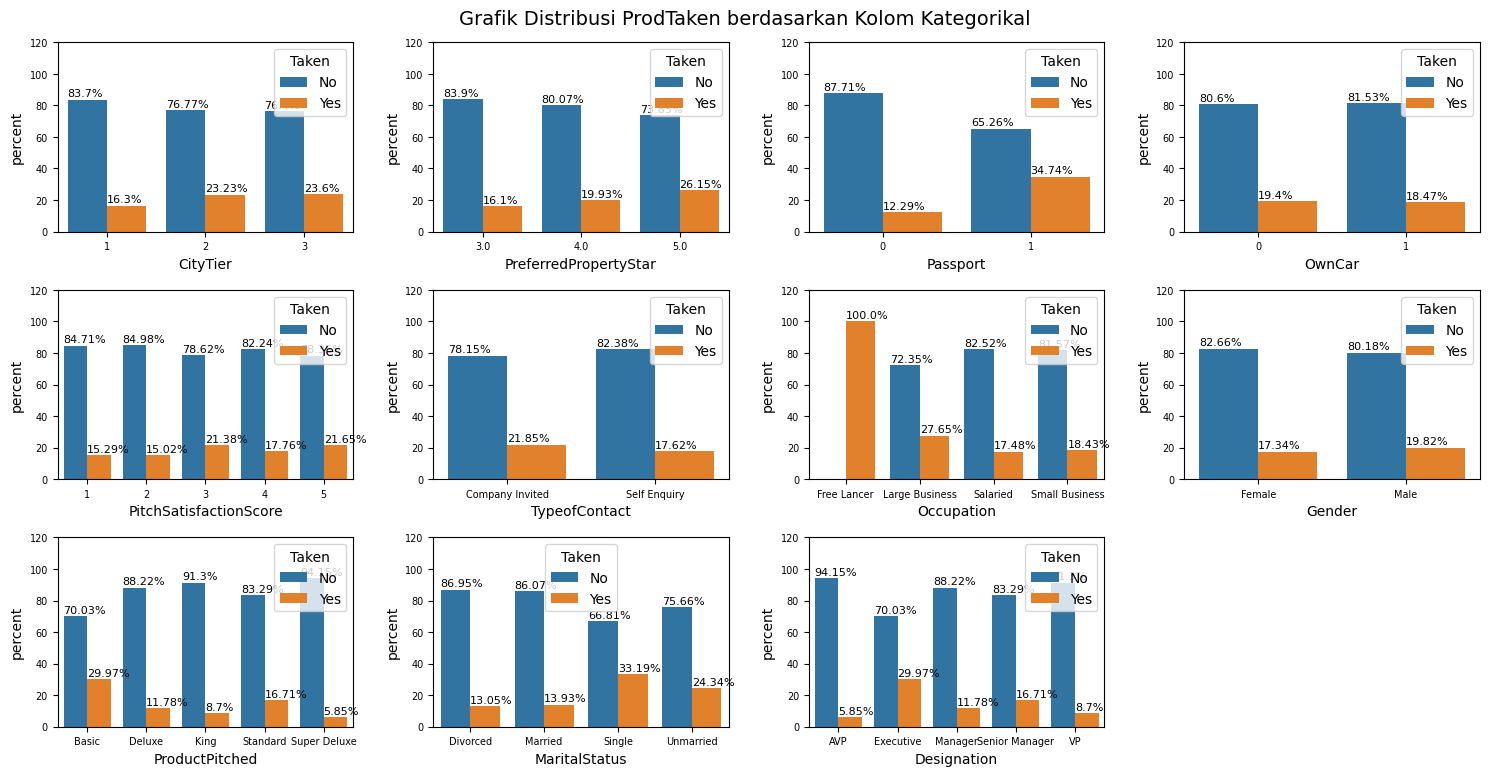

In [81]:
plt.figure(figsize=(15,10))
plt.suptitle('Grafik Distribusi ProdTaken berdasarkan Kolom Kategorikal', fontsize=14)

for i, col in enumerate(cats[1:]):
    plt.subplot(4, 4, i+1)
    plt.tick_params(axis='both', which='major', labelsize=7)        
    plt.ylabel('Percentage')
    df1 = df.groupby(col)['ProdTaken'].value_counts(normalize=True)
    df1 = df1.mul(100)
    df1 = df1.rename('percent').reset_index()
    
    g = sns.barplot(x=col, y='percent', hue='ProdTaken', data=df1)
    g.set_ylim(0, 120)    
    g.set_yticks(range(0,121,20))
    g.legend(title='Taken')

    for p in g.patches:
        txt = str(p.get_height().round(2)) + '%'
        txt_x = p.get_x()
        txt_y = p.get_height()

        # Skips error due to Freelancer having 100% ProdTaken rate
        if np.isnan(txt_y):
            continue
        g.text(txt_x, txt_y + 2, txt, ha='left', size=8)

        # Custom legend
        legend = plt.gca().get_legend()
        legend.set_title('Taken')
        legend.get_texts()[0].set_text('No')
        legend.get_texts()[1].set_text('Yes')
        
plt.tight_layout()

plt.show()

Performansi salesman dalam menawarkan product tidak terlalu berpengaruh signifikan terhadap keputusan akhir konsumen untuk membeli product atau tidak, dapat dilihat pada plot bahwa Jumlah customer yang membeli product namun memberikan nilai kepuasan pitching salesman 3 lebih banyak dibandingkan dengan yang memberi nilai kepuasan 5

<Figure size 1500x1500 with 0 Axes>

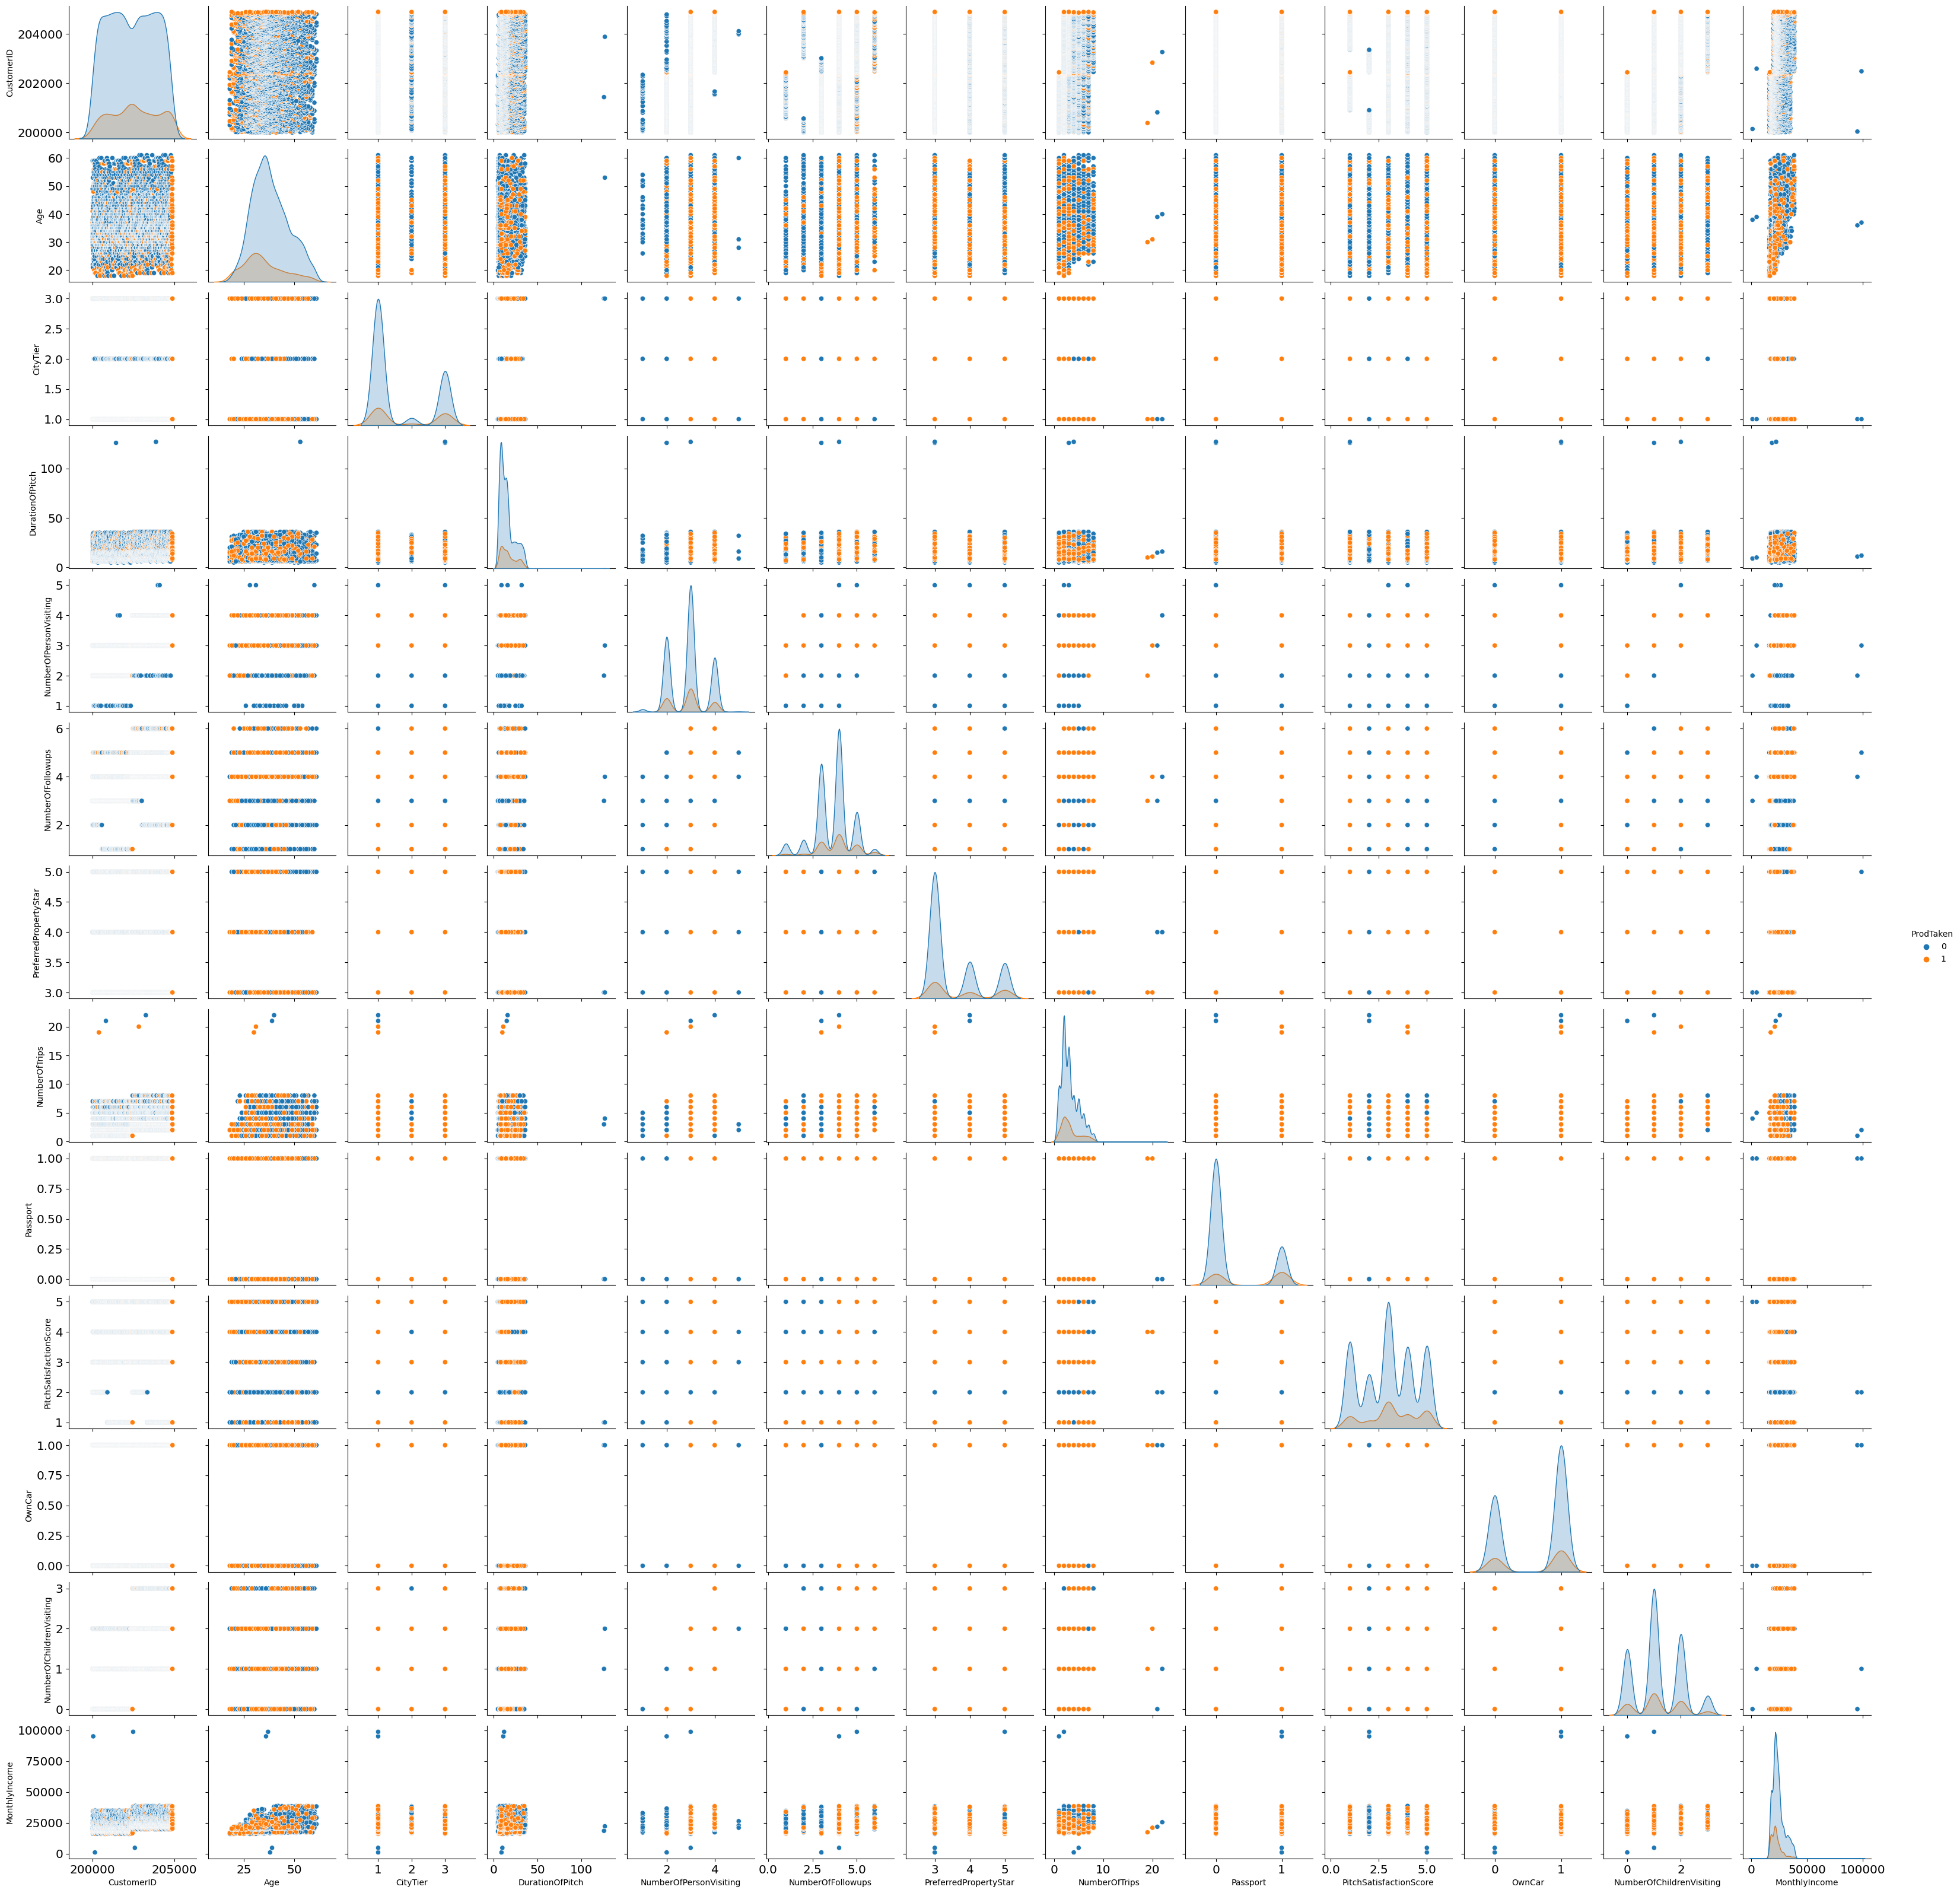

In [67]:
plt.figure(figsize=(15,15))
sns.pairplot(df, hue='ProdTaken')
plt.show()